Import all the required modules.

In [30]:
from Data_modules import DataLoader, Visualizer, MissingValuesHandler, ModelRegressor, ModelClassifier, ModelMetrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets load data and initialize all modules.

In [31]:
salary_df = DataLoader().load_data('Data/Salary Data.csv')
visual = Visualizer()
values_handler = MissingValuesHandler()
regressor = ModelRegressor()
classifier = ModelClassifier()
metrics = ModelMetrics()
enc = OrdinalEncoder(dtype=int)

print(salary_df.head())
print(salary_df.info())
print(salary_df.describe())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary

This table contains data on employees of various companies.

This table contains the following columns:

Age - age (years).

Gender - gender (male/female).

Education Level - the level of education (Bachelor/Master/PhD).

Job Title - position (category).

Years of Experience - work experience (years).

Salary - salary ($ per year)

Check if table have any NULL values.

Removed rows that contains empty target column values.

In [32]:
values_handler.get_missing_values_statistics(salary_df)

salary_df = salary_df.dropna(subset=["Salary"])

                     Total Count  Missing Values  Missing Percentage
Age                          375               2                0.53
Gender                       375               2                0.53
Education Level              375               2                0.53
Job Title                    375               2                0.53
Years of Experience          375               2                0.53
Salary                       375               2                0.53


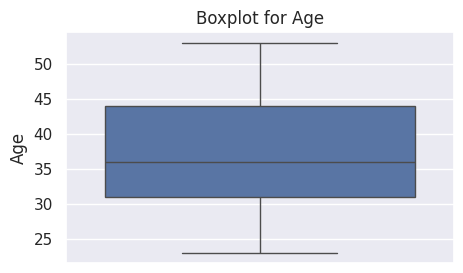

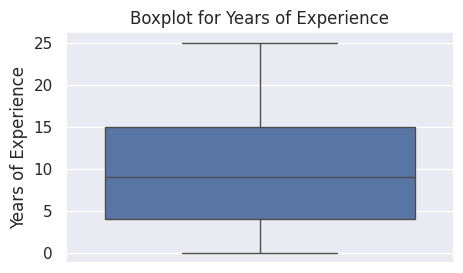

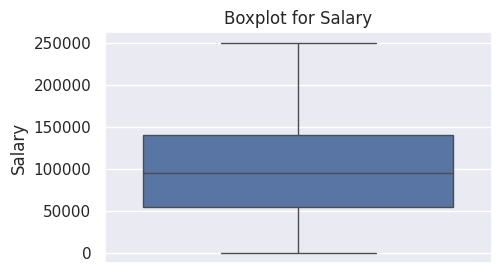

In [33]:
for column in salary_df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=salary_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Normalize table values, replacing category columns with integer values.

In [34]:
categ_columns = ['Gender', 'Education Level', 'Job Title']
enc.fit(salary_df[categ_columns])


salary_df[categ_columns] = enc.transform(salary_df[categ_columns])
print(salary_df.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


Let's check our target column (Salary)

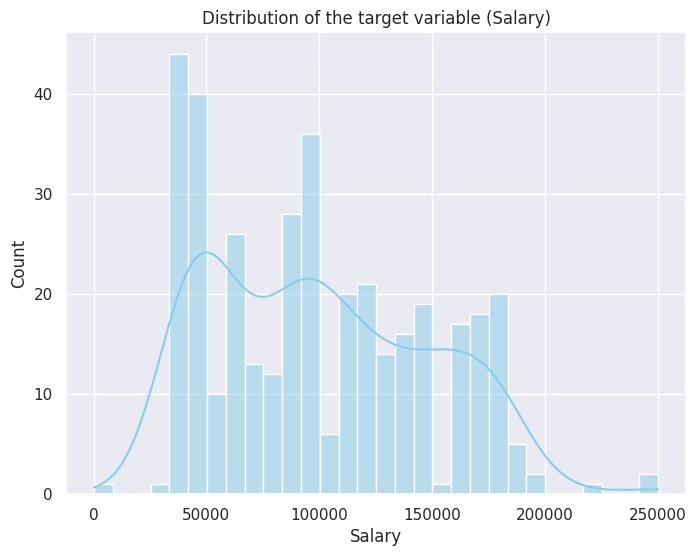

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(salary_df['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of the target variable (Salary)')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

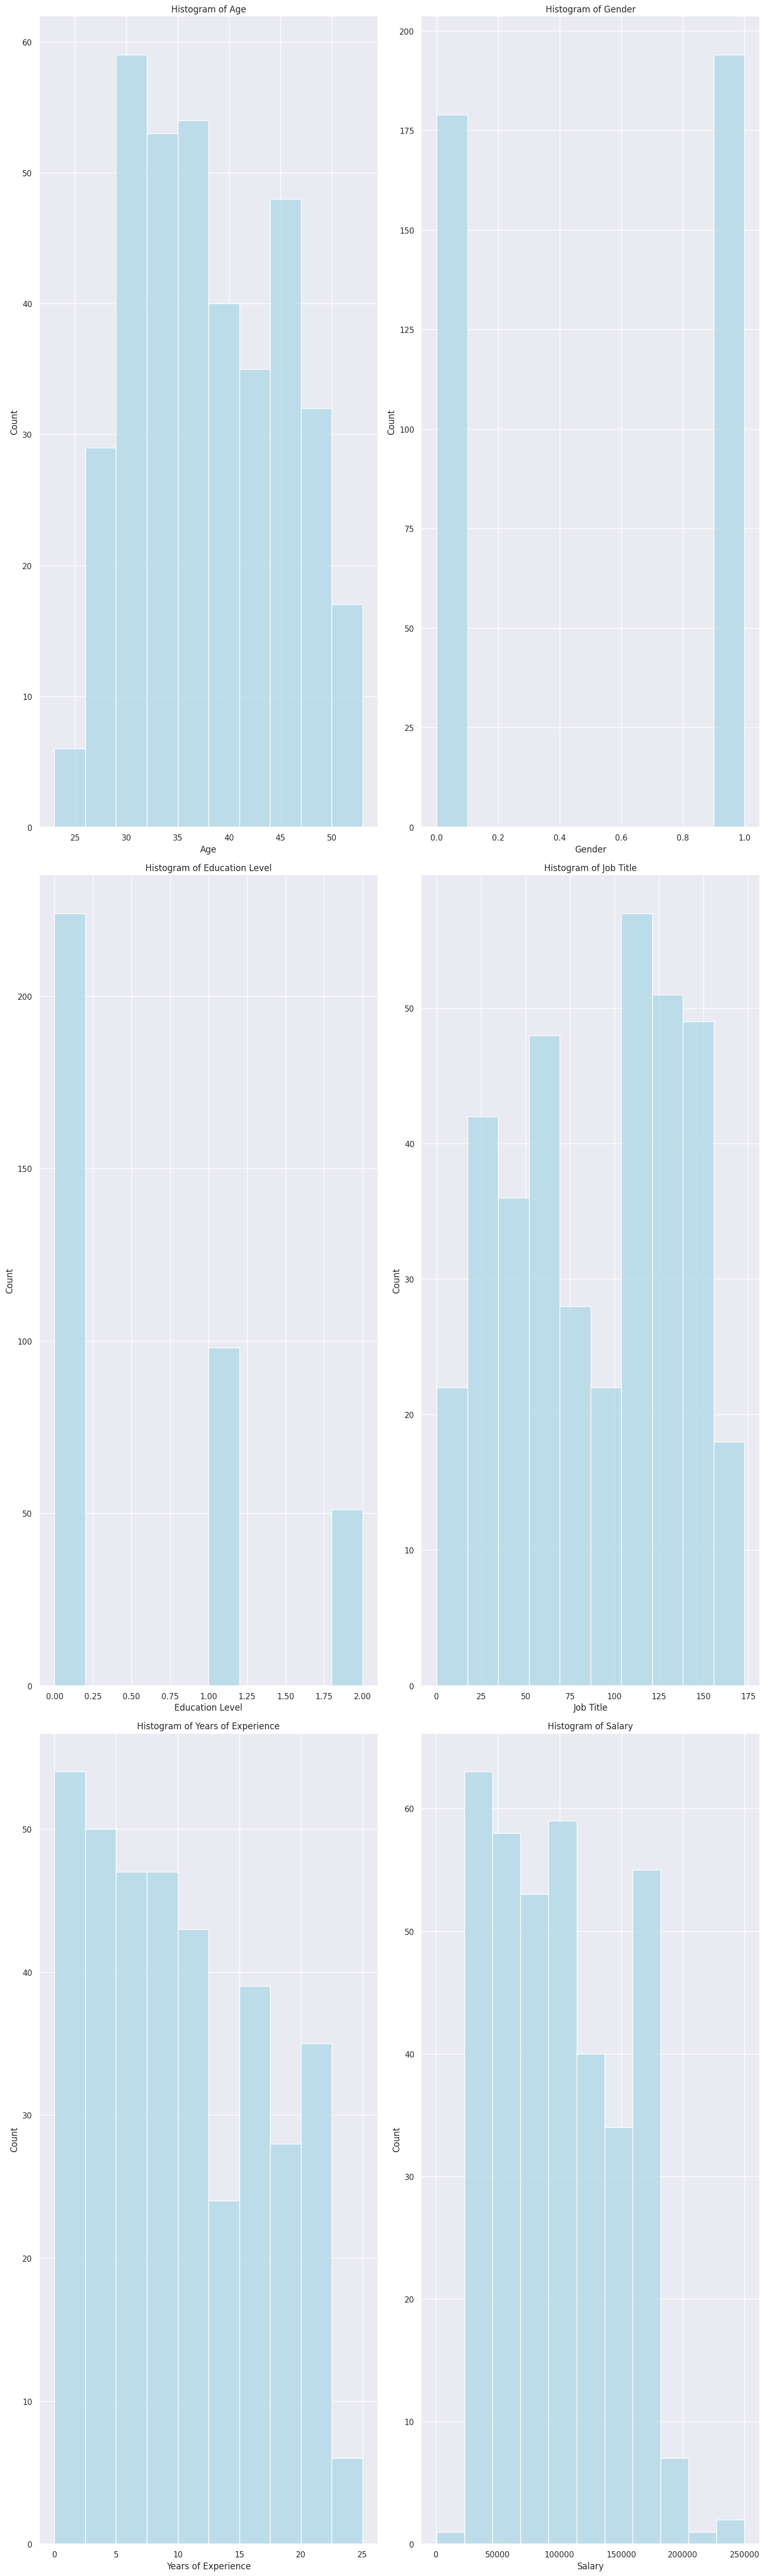

In [36]:
visual.show_histogram(salary_df)

Let's check correlation matrix.

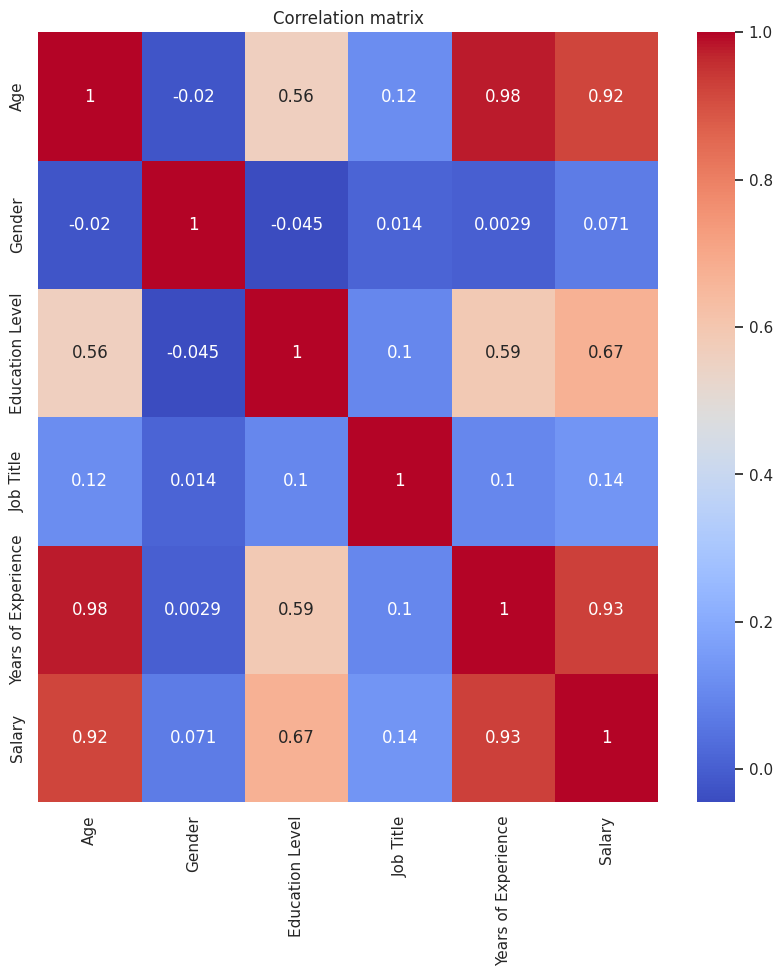

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(salary_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

Let's split data on train and test.

In [38]:
X = salary_df.drop('Salary', axis=1)
y = salary_df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
result = regressor.get_all_models(X_train, X_test, y_train)

In [40]:
metrics_result = metrics.get_regression_models_metrics(y_test, result)

----------------------
Gradient Boosting model metrics:
MSE: 138949952.0463
MAE: 8417.4068
R2: 0.9278
----------------------
----------------------
Ada Boost model metrics:
MSE: 203689500.5361
MAE: 11253.0599
R2: 0.8941
----------------------
----------------------
Extra Trees model metrics:
MSE: 132652700.0000
MAE: 7578.0000
R2: 0.9311
----------------------
----------------------
K Neighbors model metrics:
MSE: 291709464.0000
MAE: 11398.1333
R2: 0.8484
----------------------
----------------------
Decision Tree model metrics:
MSE: 169008300.0000
MAE: 7995.3333
R2: 0.9122
----------------------
----------------------
SVM model metrics:
MSE: 1928218062.4883
MAE: 34989.2235
R2: -0.0021
----------------------
----------------------
eXtreme GBM model metrics:
MSE: 147870995.0695
MAE: 8444.4371
R2: 0.9232
----------------------
----------------------
Light GBM model metrics:
MSE: 160042005.9155
MAE: 9179.6226
R2: 0.9168
----------------------
----------------------
Cat Boost model metrics:

In [45]:
metrics.get_all_models_r2()

{'SVM': '-0.0021',
 'K Neighbors': '0.8484',
 'Ada Boost': '0.8941',
 'Decision Tree': '0.9122',
 'Light GBM': '0.9168',
 'eXtreme GBM': '0.9232',
 'Gradient Boosting': '0.9278',
 'Extra Trees': '0.9311',
 'Cat Boost': '0.9385'}

As we can see, Cat Boost shown best accuracy.

Let's visualize comparing predicted values and actual values.

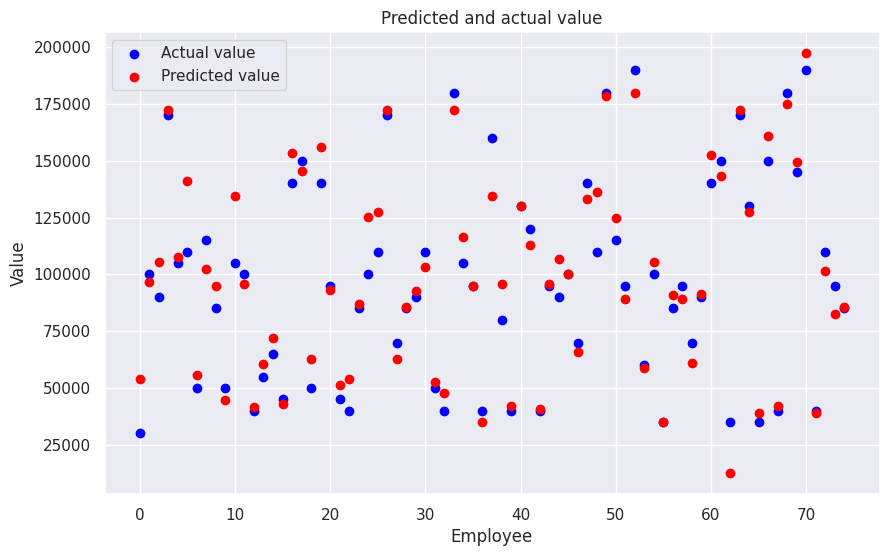

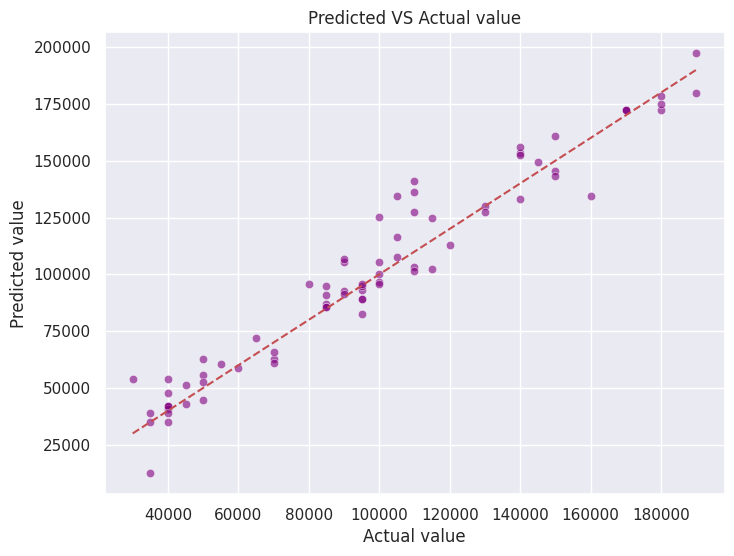

In [42]:

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual value')
plt.scatter(range(len(y_test)), result['Cat Boost']['predict'], color='red', label='Predicted value')
plt.xlabel('Employee')
plt.ylabel('Value')
plt.title('Predicted and actual value')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=result['Cat Boost']['predict'], color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Predicted VS Actual value')
plt.show()

Let's evaluate feature importance.

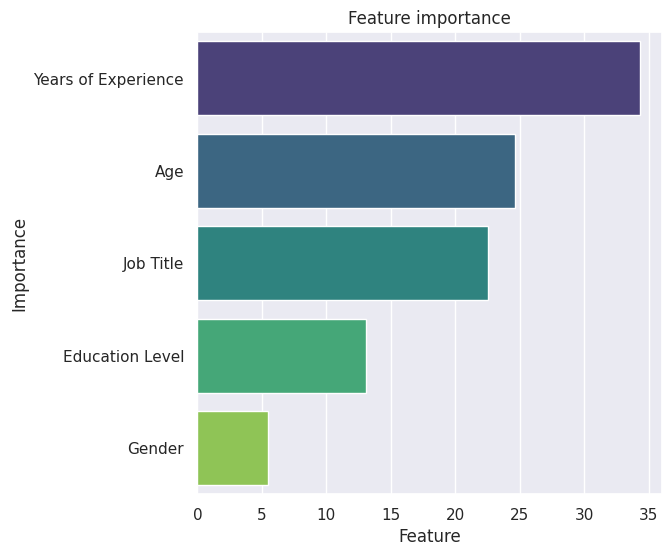

In [46]:
feature_names = X_train.columns
importances = result['Cat Boost']['model'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices],  hue=np.array(feature_names)[indices], palette='viridis')
plt.title('Feature importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Now, let's check anomalies in our test data.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


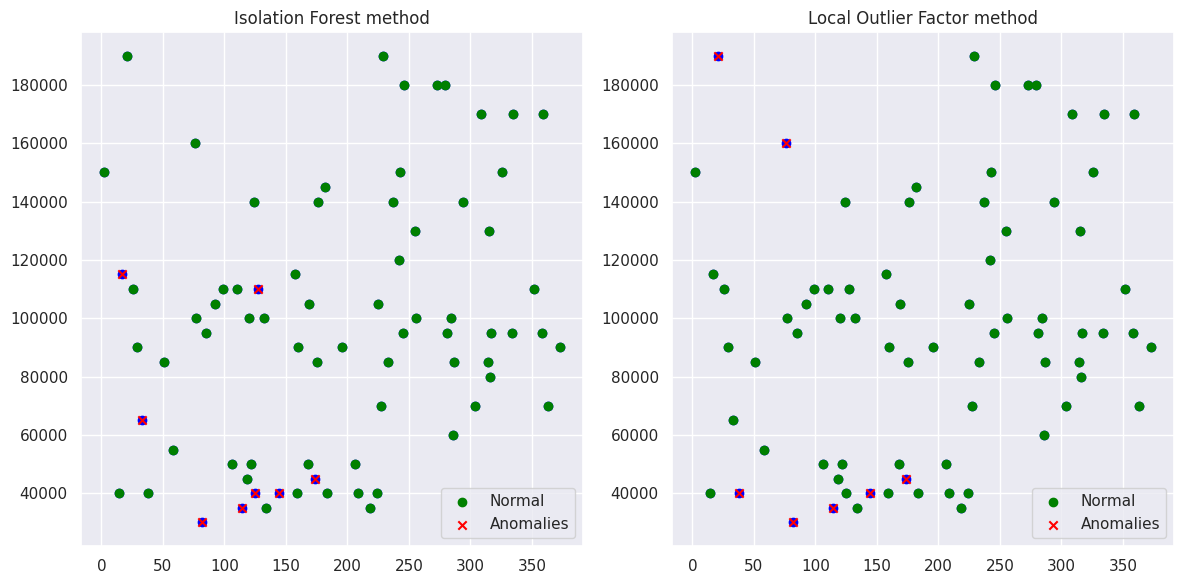

In [120]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

eif = IsolationForest(contamination=0.1)
eif.fit(X_train)
eif_y_pred = eif.predict(X_test)
eif_normal_points = y_test[eif_y_pred == 1]
eif_anomalies = y_test[eif_y_pred == -1]

lof = LocalOutlierFactor(novelty=True, n_neighbors=5)
lof.fit(X_train)
lof_y_pred = lof.predict(X_test)
lof_normal_points = y_test[lof_y_pred == 1]
lof_anomalies = y_test[lof_y_pred == -1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.title("Local Outlier Factor method")
plt.scatter(x=y_test.index, y=y_test, c='blue')
plt.scatter(x=eif_normal_points.index, y=eif_normal_points, c='green', marker='o', label='Normal')
plt.scatter(x=eif_anomalies.index, y=eif_anomalies, c='red', marker='x', label="Anomalies")
plt.legend()


plt.subplot(1, 2, 1)
plt.title("Isolation Forest method")
plt.scatter(x=y_test.index, y=y_test, c='blue')
plt.scatter(x=lof_normal_points.index, y=lof_normal_points, c='green', marker='o', label='Normal')
plt.scatter(x=lof_anomalies.index, y=lof_anomalies, c='red', marker='x', label="Anomalies")
plt.legend()

plt.tight_layout()
plt.show()